# Proyecto 1


Integrantes:
- Jair Salvador Arreola Espinosa
- Mauricio Armeria 
- Rodrigo Girón Lugo

# "Tendencia y estimación de los puestos de trabajo generados por el Sector de la Construcción"


## Introducción
>Tradicionalmente el sector construcción ha sido un gran generador de empleos para la economía mexicana. En el año 2017 el sector
construcción generó un total de 6 millones 111 mil 114 puestos de trabajo, de los cuales 4 millones 062 mil 514 correspondieron a la edificación
(Residencial y No Residencial).



## Objetivos
>En éste proyecto veremos el porcentaje  de Generación de empleos en el sector de la Construcción, con la final de hacer una aproximación mediante un ajuste de curvas y poder medir estimación de generación de empleos en el año 2022 y compare con el dato real.

### Objetivos generales

### Objetivos específicos
 - Observar el crecimiento constante de la Genereación de empleos en la construcción.
 - Evaluar graficando los datos obtenidos de 2010 a 2022. 
 - Hacer un ajuste de curvas con los datos ya graficados.

### Modelo del problema

### Solución del problema

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
import scipy.optimize as opt
import pandas as pd

In [2]:
df = pd.DataFrame(columns=['Trabajos Directos', 'Trabajos Indirectos','año'], index = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'])
df.loc['2010', :] = [5489432, 2744716, 1]
df.loc['2011', :] = [5709009, 2854505, 2]
df.loc['2012', :] = [5846025, 2923013, 3]
df.loc['2013', :] = [5753962, 2876981, 4]
df.loc['2014', :] = [5909319, 2954659, 5]
df.loc['2015', :] = [6051142, 3025571, 6]
df.loc['2016', :] = [6166114, 3083057, 7]
df.loc['2017', :] = [6111114, 3055557, 8]
df.loc['2018', :] = [6147781, 3073890, 9]
df.loc['2019', :] = [6050965, 3025483, 10]
df.loc['2020', :] = [6171984, 3085992, 11]
df.loc['2021', :] = [6326284, 3163142, 12]
df.loc['2022', :] = [6516073, 3258036, 13]
df

,Trabajos Directos,Trabajos Indirectos,año
2010,5489432,2744716,1
2011,5709009,2854505,2
2012,5846025,2923013,3
2013,5753962,2876981,4
2014,5909319,2954659,5
2015,6051142,3025571,6
2016,6166114,3083057,7
2017,6111114,3055557,8
2018,6147781,3073890,9
2019,6050965,3025483,10


In [3]:
x = df.iloc[:,0].values # Trabajos indirectos
y = df.iloc[:,1].values # Años

In [4]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    e = y-yhat
    return np.sum(e**2)

In [5]:
b01 = np.zeros(2) #beta inicales
b02 = np.zeros(3)
b03 = np.zeros(4)

ajuste1 = opt.minimize(fun_obj,b01,args=(x,y,1))  #soluciones
ajuste2 = opt.minimize(fun_obj,b02,args=(x,y,2))
ajuste3 = opt.minimize(fun_obj,b03,args=(x,y,3))

In [6]:
ajuste1

      fun: 1.3644466165552744
 hess_inv: array([[ 1.46190247e+01, -2.46140152e-06],
       [-2.46140152e-06,  4.15136660e-13]])
      jac: array([-1.43432981e+00, -1.05090953e+06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 232
      nit: 2
     njev: 55
   status: 2
  success: False
        x: array([1.33365523, 0.49999977])

In [7]:
ajuste2

      fun: 1177533015012.8672
 hess_inv: array([[ 1.00000000e+00, -4.49578882e-21, -2.74996810e-14],
       [-4.49578882e-21,  1.00000000e+00, -1.65197514e-07],
       [-2.74996810e-14, -1.65197514e-07,  2.72902185e-14]])
      jac: array([-7.30726400e+06, -4.33646816e+13,  6.80844004e+13])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 195
      nit: 1
     njev: 37
   status: 2
  success: False
        x: array([2.27823718e-21, 1.36705362e-14, 7.51481778e-08])

In [8]:
ajuste3

      fun: 117974407744944.0
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([-7.86432000e+07, -4.71897625e+14, -2.59406406e+21,  3.57822654e+30])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 534
      nit: 0
     njev: 87
   status: 2
  success: False
        x: array([0., 0., 0., 0.])

In [9]:
beta1 = ajuste1.x
beta2 = ajuste2.x
beta3 = ajuste3.x

In [10]:
yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3

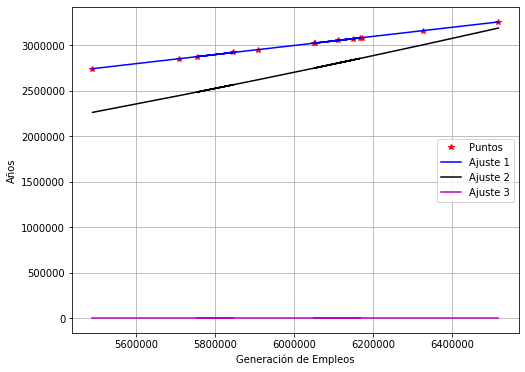

In [11]:
plt.figure(figsize=(8,6))
plt.plot(x,y,'r*',ms = 6,label='Puntos')
plt.plot(x,yhat1,'b',ms = 6,label='Ajuste 1')
plt.plot(x,yhat2,'k',ms = 6,label='Ajuste 2')
plt.plot(x,yhat3,'m',ms = 6,label='Ajuste 3')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Generación de Empleos')
plt.ylabel('Años')
plt.show()

Text(0, 0.5, 'Error')

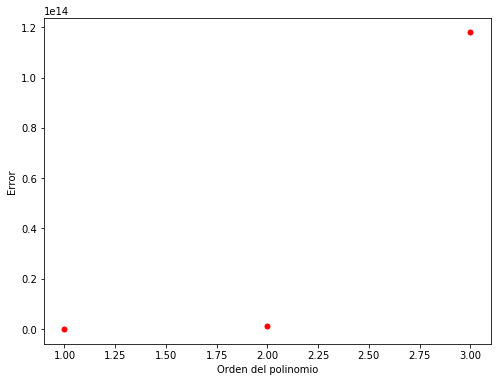

In [12]:
error = [ajuste1.fun,ajuste2.fun,ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4),error,'ro',ms=5)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error')

######  Con los polinomios ajustados en el punto anterior, estime el consumo en el año 2022 y compare con el dato real  ??

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [13]:
x = 13 #Dato extraído de la tabla en el año 2022
yhat1 = beta1[0] + beta1[1]*x
yhat2 = beta2[0] + beta2[1]*x + beta2[2]*x**2
yhat3 = beta3[0] + beta3[1]*x + beta3[2]*x**2 + beta3[3]*x**3

yhat1,yhat2,yhat3,3258036

(7.83365223177467, 1.2700042232165289e-05, 0.0, 3258036)

### Conclusiones
- podemos concluir que por medio del proyecto realizado se puede desarrollar el objetivo que se planteó en un principio fue la construcción de un ajuste de curva.

### Referencias
https://www.cmic.org.mx/cmic/ceesco/2019/PDF/Tendencia%20y%20Estimaci%C3%B3n%20de%20los%20puestos%20Trabajo%2005-07-19.pdf